In [8]:
import sys
sys.path.append("../scripts/")
from kld_mcl import *

In [12]:
class GlobalKldMcl(KldMcl):
    def __init__(self, envmap, max_num, motion_noise_stds={"nn":0.19, "no": 0.001, "on":0.13, "oo": 0.2},
                distance_dev_rate=0.14, direction_dev=0.05):
        super().__init__(envmap, np.array([0, 0, 0]).T, max_num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.particles = [Particle(None, 1.0/max_num) for i in range(max_num)]
        for p in self.particles:
            p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(5.0, -5.0), np.random.uniform(-math.pi, math.pi)]).T
            
        self.observed = False
        
    def motion_update(self, nu, omega, time):
        if not self.observed and len(self.particles) == self.max_num:
            for p in self.particles:
                p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
            return
        
        super().motion_update(nu, omega, time)
        
    def observation_update(self, observation):
        super().observation_update(observation)
        self.observed = len(observation) > 0

In [14]:
def trial(animation):
    time_interval = 0.1
    world = World(30, time_interval, debug=not animation)
    
    m = Map()
    for ln in [(-4, 2), (2, -3), (3, 3)]:
        m.append_landmark(Landmark(*ln))
    world.append(m)
    
    init_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(5.0, -5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalKldMcl(m, 200)
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)
    
    world.draw()
    
    return (r.pose, pf.pose)

<IPython.core.display.Javascript object>


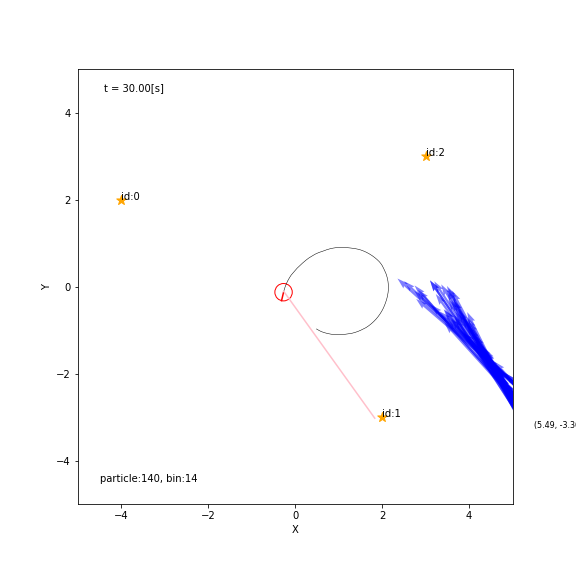

(array([ 0.48866892, -0.97488138, -0.5539722 ]), array([0, 0, 0]))

In [17]:
trial(True)